<a href="https://colab.research.google.com/github/Staffilon/KestraDataOrchestrator/blob/main/Analysis_and_Exploration/energy_overall_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "gdrive/MyDrive/Dati-TBDM/refined_data"

/content/gdrive/.shortcut-targets-by-id/1xGTanGyuk-TCLCMoGz5VNG7sUEscVC-Z/Dati-TBDM/refined_data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
energy_df = pd.read_csv("modified_energy_data.csv")
fermate_df = pd.read_csv("modified_fermate_data.csv")
merged_energy = pd.read_csv("energy_fermate_merged.csv")
merged_pieces = pd.read_csv('pieces_energy_merged.csv')

In [10]:
merged_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102827 entries, 0 to 102826
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  102827 non-null  int64  
 1   SHIFT_DATE          102827 non-null  object 
 2   SHIFT_CODE          102827 non-null  int64  
 3   SHIFT_START         102827 non-null  object 
 4   SHIFT_END           102827 non-null  object 
 5   RESOURCE            102827 non-null  int64  
 6   PRODUCTION_ORDER    102827 non-null  int64  
 7   STAGE               102827 non-null  int64  
 8   STOP_CODE           102827 non-null  int64  
 9   T_STOP              102827 non-null  int64  
 10  QTY_GOOD            102827 non-null  int64  
 11  QTY_SCRAP           102827 non-null  int64  
 12  DESFERM             102827 non-null  object 
 13  EnergyRetrieval_ID  31691 non-null   float64
 14  Energy_Value        31691 non-null   float64
dtypes: float64(2), int64(9), object(4)

Energy analysis grouped by machine

In [7]:
# Convert 'energy_value' column to numeric
merged_pieces['energy_value'] = pd.to_numeric(merged_pieces['energy_value'], errors='coerce')

# Group by 'COD_MACC' and calculate mean of 'energy_value'
mean_energy_by_cod_macc = merged_pieces.groupby('COD_MACC')['energy_value'].mean()

# Count occurrences of each 'COD_MACC'
count_by_cod_macc = merged_pieces['COD_MACC'].value_counts()

# Merge mean energy values and counts into a single DataFrame
result_df = pd.DataFrame({'Mean_Energy_Value': mean_energy_by_cod_macc, 'Count': count_by_cod_macc})

print(result_df)

       Mean_Energy_Value  Count
108.0          13.398460  25157
110.0        1622.810320  36402
301.0        1523.218410  34247
302.0        1666.701098  40814
303.0        1669.405927  35795
304.0        1478.745253  35013
305.0        1541.500076  20281
306.0        2606.544207  31399
307.0        1184.289560  27515
308.0        1653.496370  29038
309.0        1821.637608  38791
310.0        1599.209918  34886
313.0        2054.635248  44030
314.0        1516.035234  28933
315.0        1528.203104  24785
319.0        1673.741560  46941
515.0        8192.430765  36332
610.0       12831.916115  36072
611.0        2076.148607  26227
612.0        2521.952162  23294
614.0       10975.167130  38394
618.0        2659.655806  20712


In [9]:
# Group by 'channel' and calculate mean of 'Ea_Imp'
mean_energy_by_channel = energy_df.groupby('channel')['Ea_Imp'].mean()

# Count occurrences of each 'channel'
count_by_channel = energy_df['channel'].value_counts()

# Merge mean energy values and counts into a single DataFrame
result_df = pd.DataFrame({'Mean_Energy_Value': mean_energy_by_channel, 'Count': count_by_channel})

print(result_df)

     Mean_Energy_Value  Count
108          12.850461  13452
110         798.777596  14801
301         702.691234  27185
302         742.613017  26918
303         667.007712  26880
304         590.506193  26918
305         449.275889  26880
306         949.879441  26918
307         471.107374  26920
308         547.899759  26920
309         738.324873  27021
310         579.242719  27021
313        1001.145456  27013
314         508.138316  27015
315         616.054741  26978
319         809.864619  26978
515        3769.373928  27018
610        5618.905493  27016
611         894.940427  26977
612        1015.888721  26979
614        5040.419542  27019
618         831.039977  26978


In [11]:
# Group by 'RESOURCE' and calculate mean of 'Energy_Value'
mean_energy_by_resource = merged_energy.groupby('RESOURCE')['Energy_Value'].mean()

# Count occurrences of each 'RESOURCE'
count_by_resource = merged_energy['RESOURCE'].value_counts()

# Merge mean energy values and counts into a single DataFrame
result_df = pd.DataFrame({'Mean_Energy_Value': mean_energy_by_resource, 'Count': count_by_resource})

print(result_df)

     Mean_Energy_Value  Count
108          14.245229   7692
110        1605.276088  10849
301        1546.536604   3889
302        1714.163245   4343
303        1702.168831   4775
304        1512.946878   3475
305        1660.169321    914
306        2664.768204   4466
307        1224.432283   4112
308        1724.006146   2236
309        1899.650123   3263
310        1719.192935   2485
313        2037.176641   3543
314        1573.951890   3223
315        1704.170614   3595
319        1742.990874   4503
515        8737.604938   5292
610       13465.638394   7989
611        2319.365052   5945
612        2681.067603   3361
614       12021.957148   8010
618        2892.997576   4867


In [14]:
# Calculate mean energy values for each dataset
mean_energy_energy_df = energy_df.groupby('channel')['Ea_Imp'].mean()
mean_energy_merged_energy = merged_energy.groupby('RESOURCE')['Energy_Value'].mean()
mean_energy_merged_pieces = merged_pieces.groupby('COD_MACC')['energy_value'].mean()

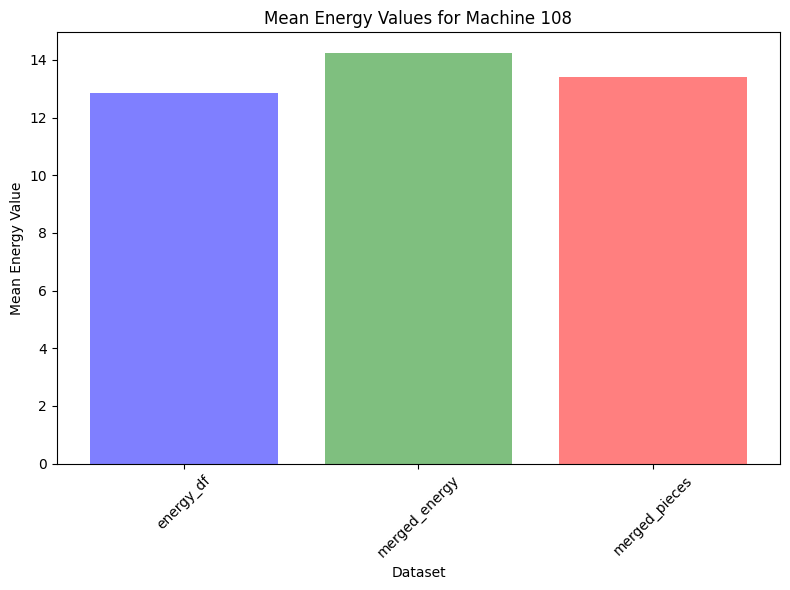

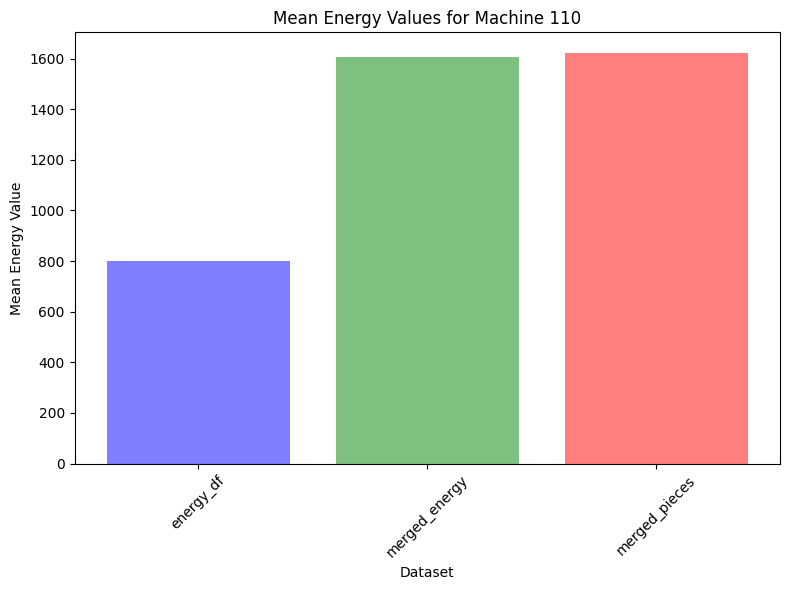

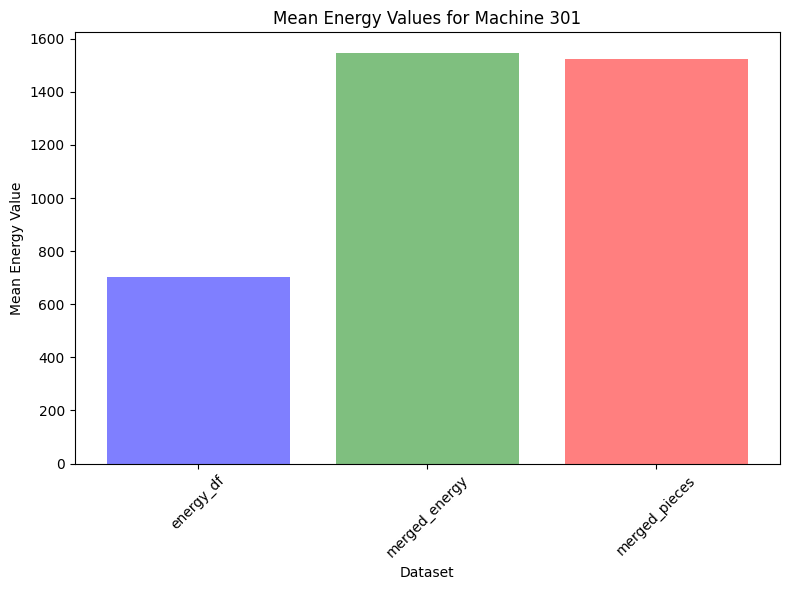

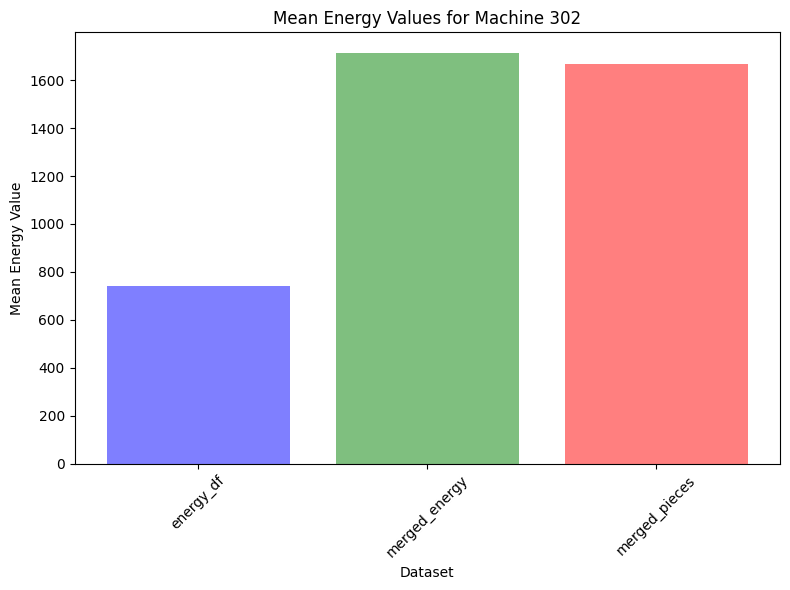

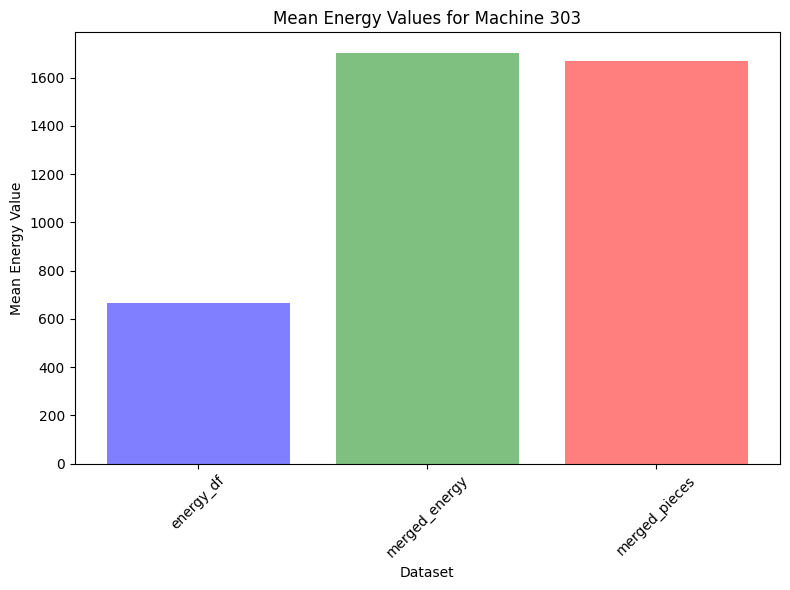

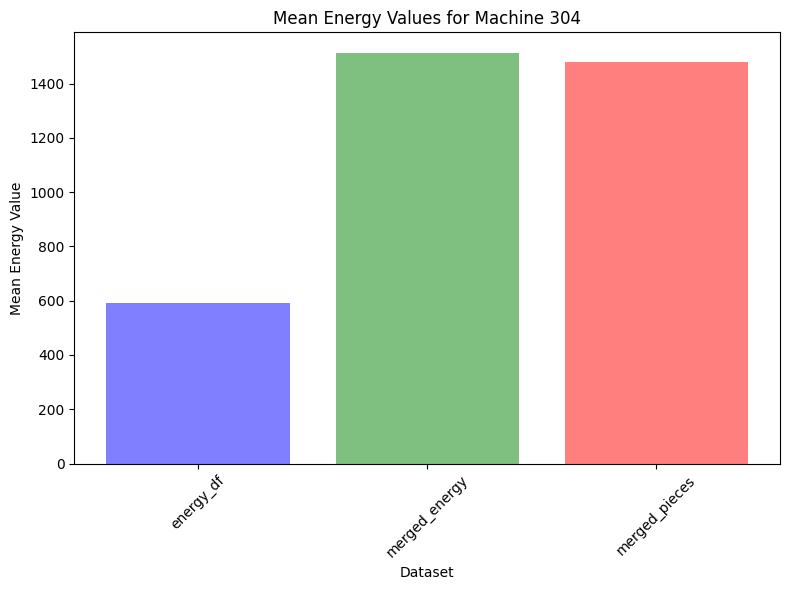

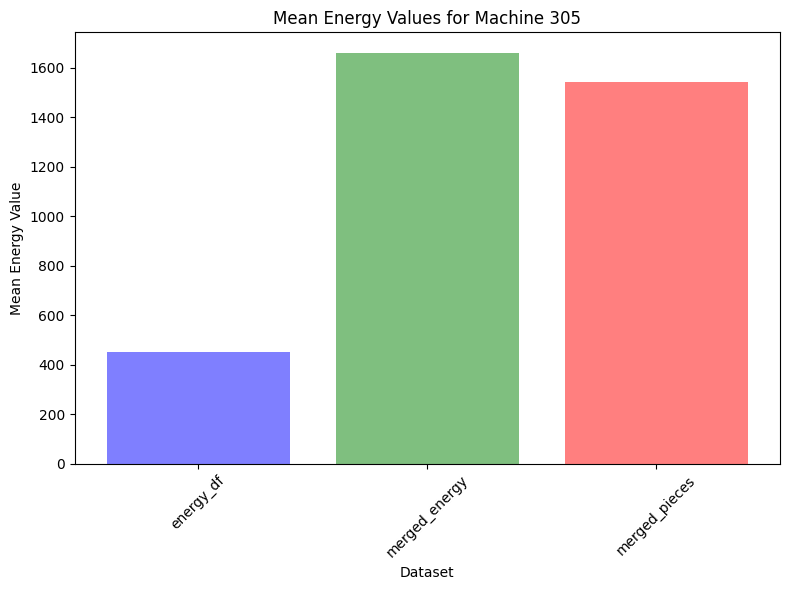

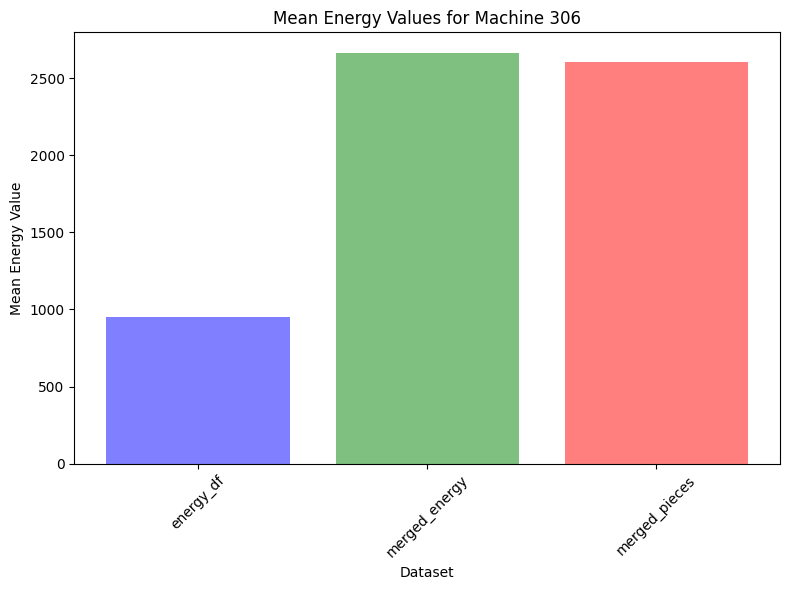

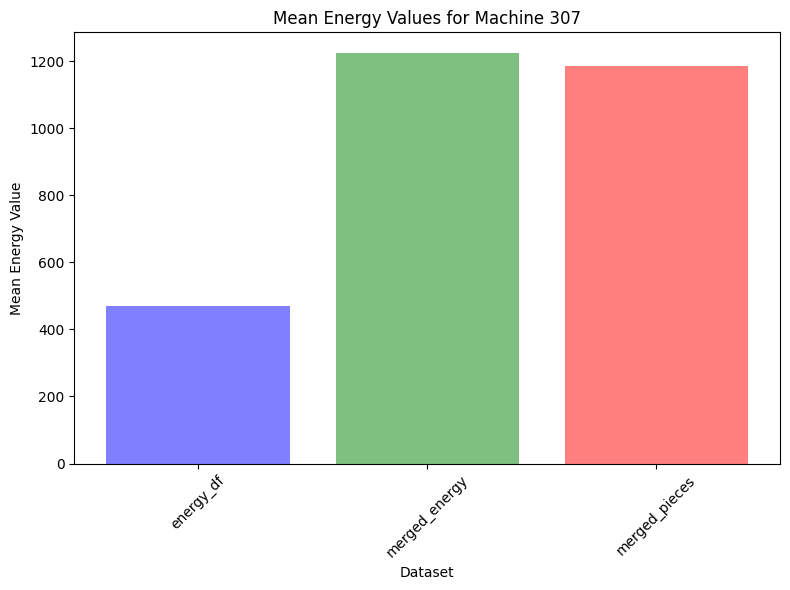

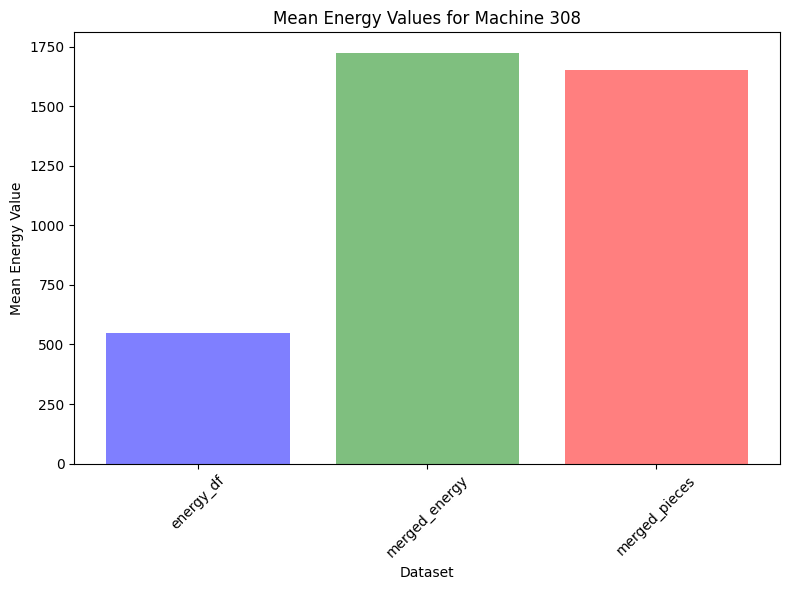

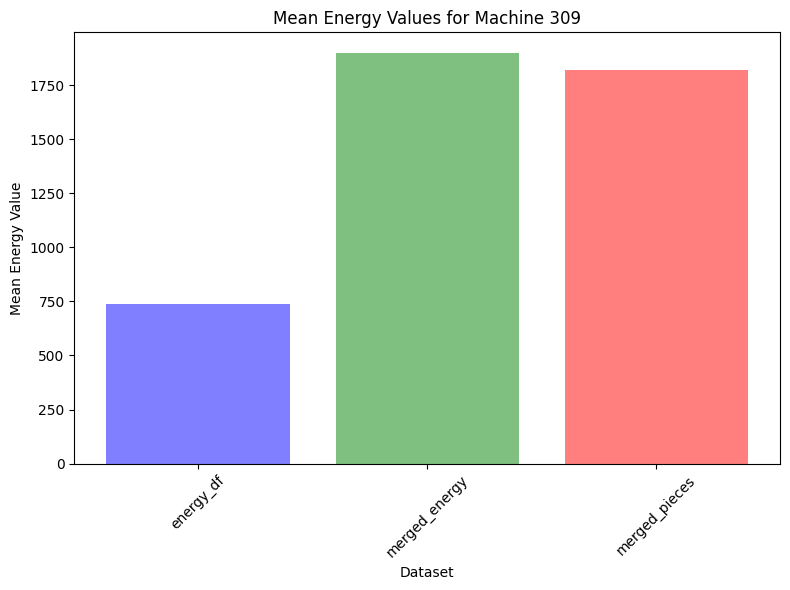

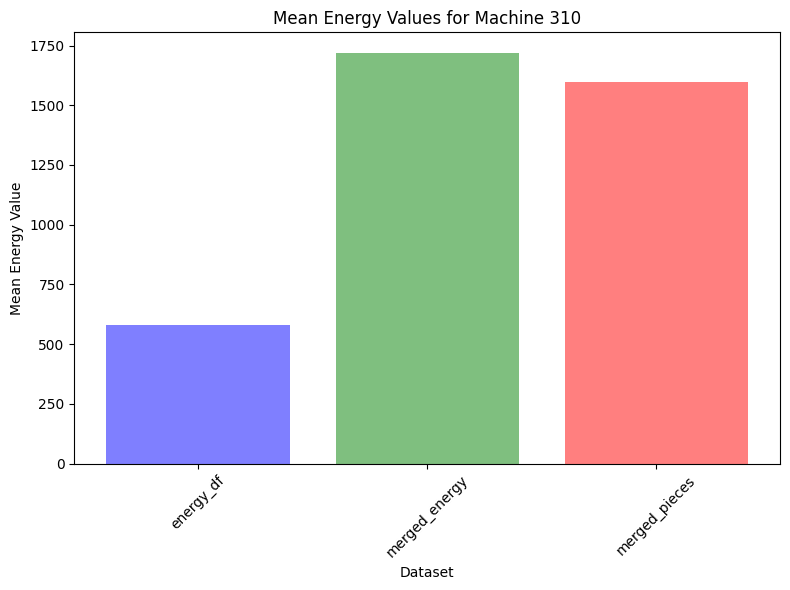

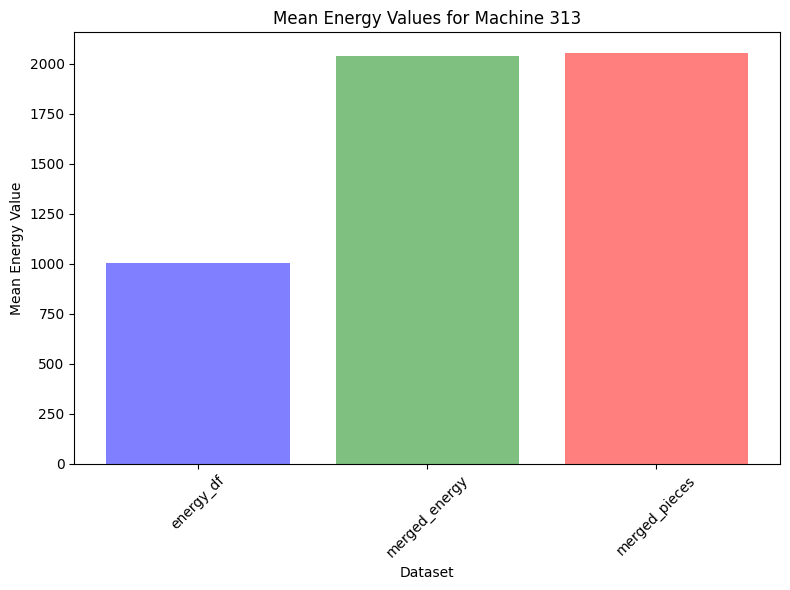

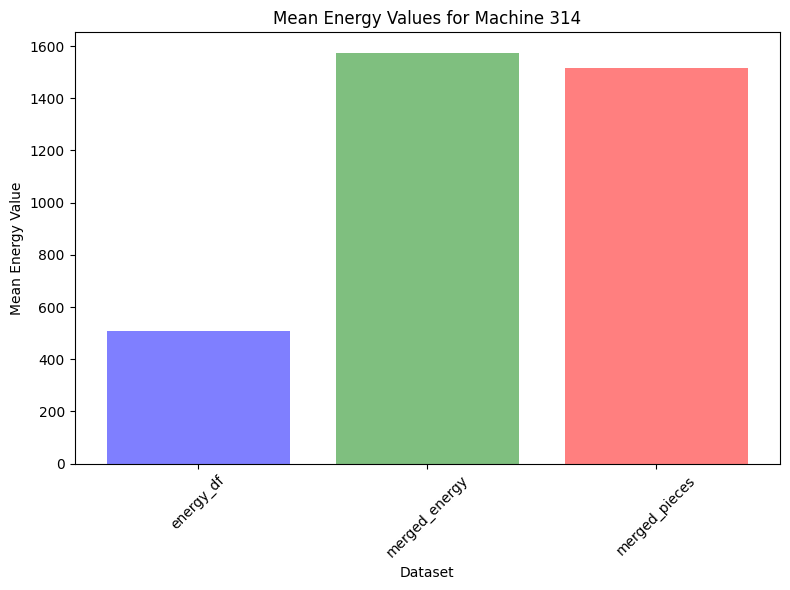

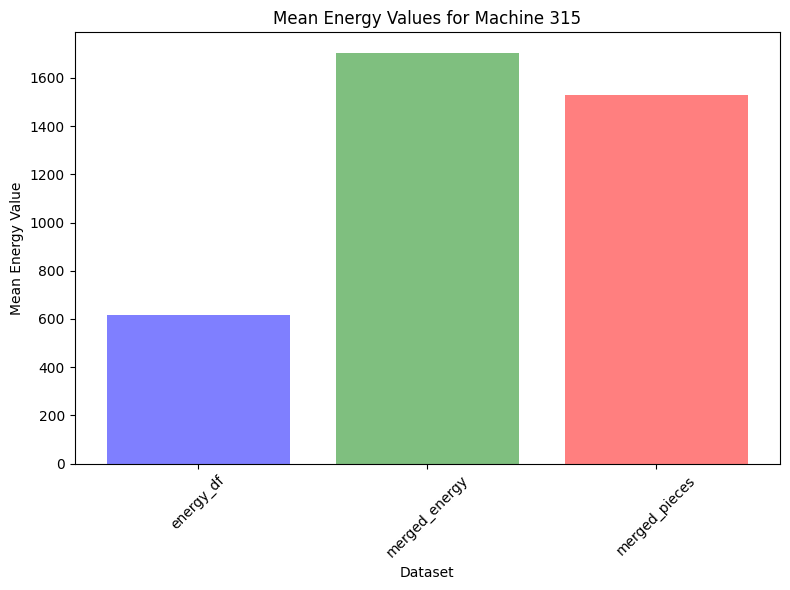

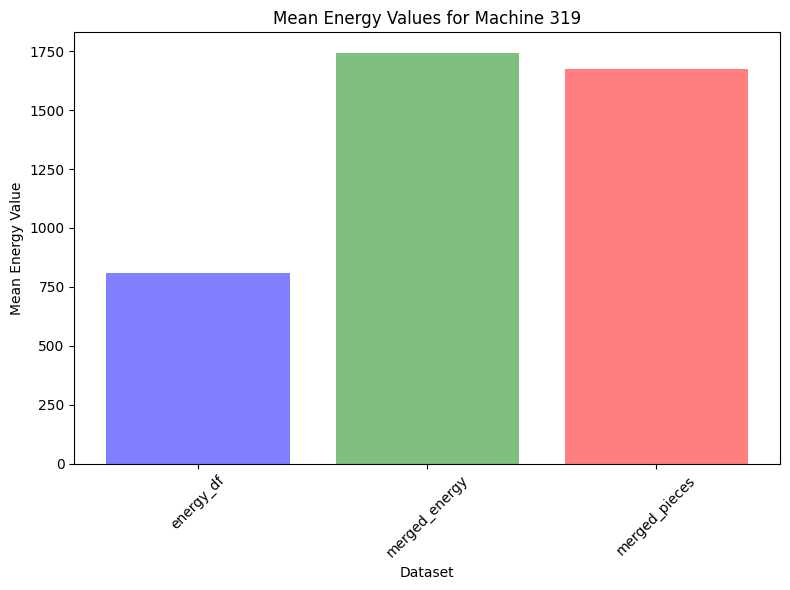

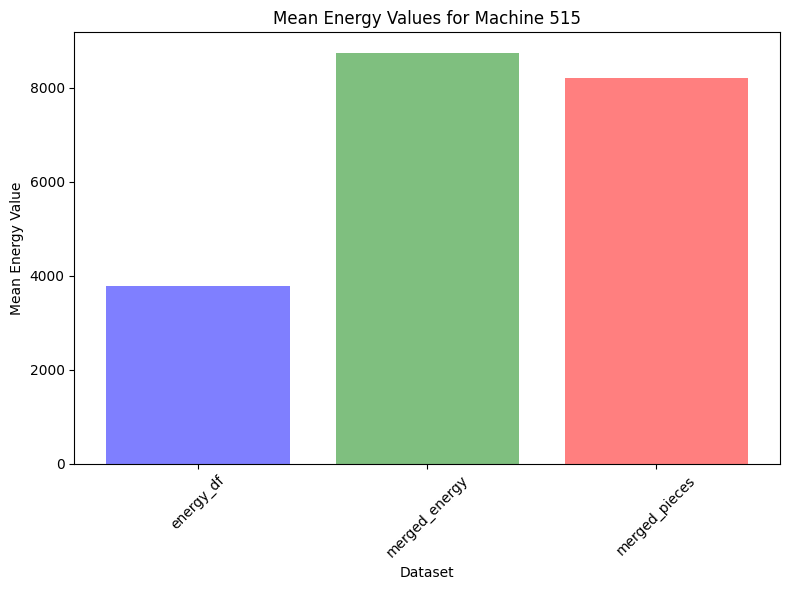

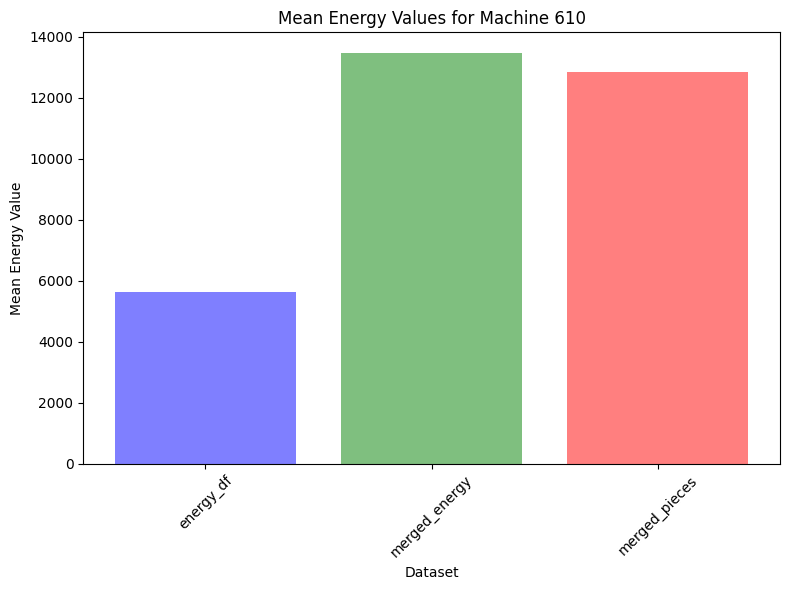

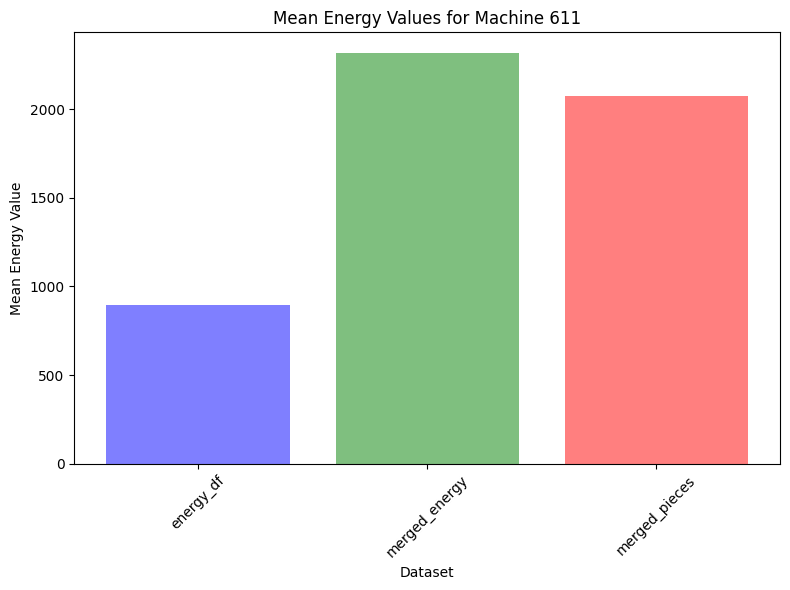

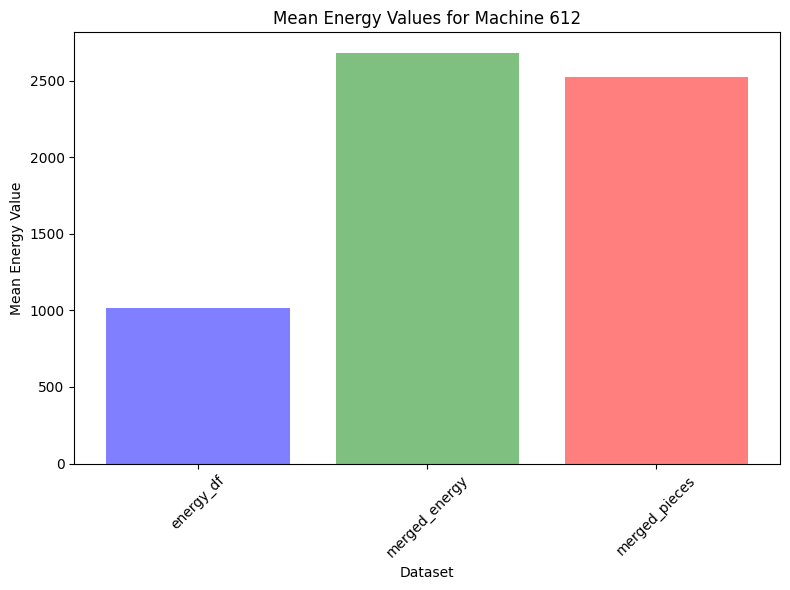

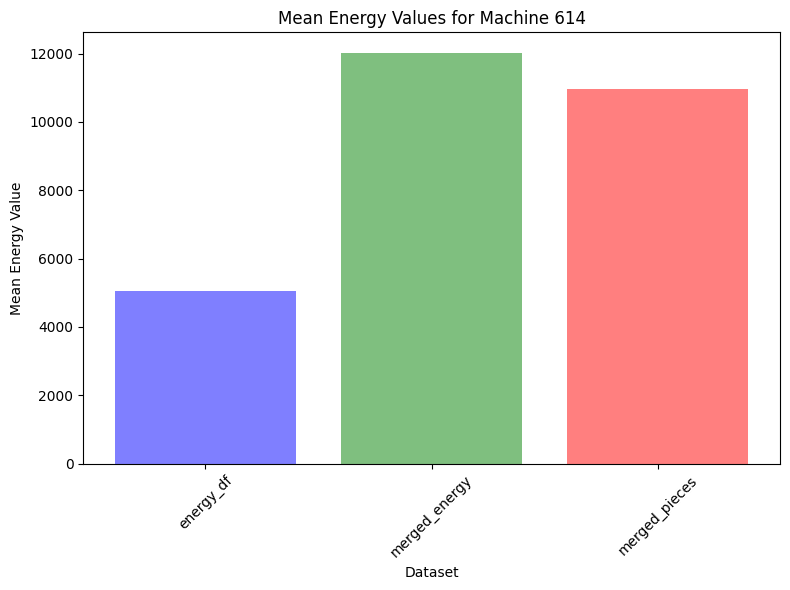

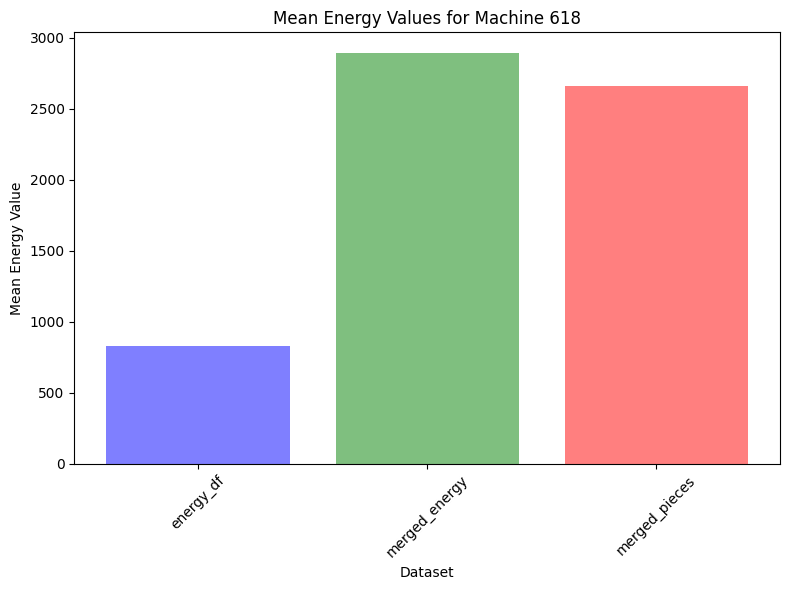

In [17]:
# Function to plot mean energy values for each machine
def plot_mean_energy_values(machine_name, energy_df_value, merged_energy_value, merged_pieces_value):
    plt.figure(figsize=(8, 6))
    plt.bar(['energy_df', 'merged_energy', 'merged_pieces'], [energy_df_value, merged_energy_value, merged_pieces_value], color=['blue', 'green', 'red'], alpha=0.5)
    plt.xlabel('Dataset')
    plt.ylabel('Mean Energy Value')
    plt.title(f'Mean Energy Values for Machine {machine_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Iterate over machines and plot mean energy values for each
for machine in merged_energy['RESOURCE'].unique():  # Assuming 'RESOURCE' contains machine information in merged_energy dataset
    energy_df_value = mean_energy_energy_df.get(machine, 0)
    merged_energy_value = mean_energy_merged_energy.get(machine, 0)
    merged_pieces_value = mean_energy_merged_pieces.get(machine, 0)
    plot_mean_energy_values(machine, energy_df_value, merged_energy_value, merged_pieces_value)